In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import tensorflow as tf

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense ,Conv1D,Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import keras


from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import regularizers



import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/breast cancer/20210926_DSC 7452 _Batch97_Modeule End Mentosrship_Case Study/breast_cancer_dataframe.csv")
df.head()

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               569 non-null    int64  
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error               5

In [ ]:
df = df.drop(["Unnamed: 0"],axis=1)

In [ ]:
df.shape

(569, 31)

In [ ]:
#independent and Dependent features
X =df.drop(['target'], axis = 1)
y =df['target']

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model = Sequential()
model.add(Conv1D(filters=16,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(32,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 16)            48        
                                                                 
 batch_normalization (BatchN  (None, 29, 16)           64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 16)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 32)            1056      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 32)           128       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 32)            0

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=35,verbose=1,validation_data=(X_test,y_test))

Epoch 1/35
13/13 [==============================] - 14s 36ms/step - loss: 0.8135 - accuracy: 0.5151 - val_loss: 0.6714 - val_accuracy: 0.7251
Epoch 2/35
13/13 [==============================] - 0s 11ms/step - loss: 0.5929 - accuracy: 0.6759 - val_loss: 0.6409 - val_accuracy: 0.8889
Epoch 3/35
13/13 [==============================] - 0s 11ms/step - loss: 0.4596 - accuracy: 0.7688 - val_loss: 0.6092 - val_accuracy: 0.9006
Epoch 4/35
13/13 [==============================] - 0s 10ms/step - loss: 0.3719 - accuracy: 0.8668 - val_loss: 0.5783 - val_accuracy: 0.9064
Epoch 5/35
13/13 [==============================] - 0s 10ms/step - loss: 0.3177 - accuracy: 0.8844 - val_loss: 0.5473 - val_accuracy: 0.9123
Epoch 6/35
13/13 [==============================] - 0s 10ms/step - loss: 0.2814 - accuracy: 0.9020 - val_loss: 0.5158 - val_accuracy: 0.9240
Epoch 7/35
13/13 [==============================] - 0s 11ms/step - loss: 0.2547 - accuracy: 0.9070 - val_loss: 0.4859 - val_accuracy: 0.9240
Epoch 8/35
1

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        63
         1.0       0.94      1.00      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 56   7]
 [  0 108]]


In [ ]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

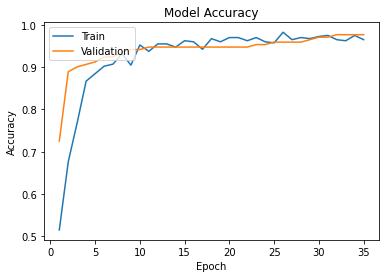

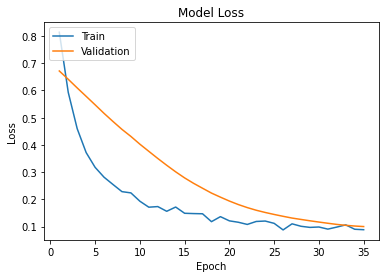

In [ ]:
plotLearningCurve(history,35)